Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "underham2ter"

import numpy as np
import matplotlib.pyplot as plt
from time import monotonic

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

Вычислим $D(f)$ такое, что $D(f)=f'(x)+\overline{O}(h^2)$

$
f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\overline{O}(h^3)
$

$
f(x+2h)=f(x)+2f'(x)h+2f''(x)h^2+\overline{O}(h^3)
$

Тогда $D(f)={{-3f(x)+4f(x+h)-f(x+2h)}\over{2h}}=f'(x)+\overline{O}(h^2)$

In [2]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    x1 = x+h
    x2 = x+2*h
    dx = x2-x1
    numerator = -3*f(x)+4*f(x1)-f(x2)
    denominator = 2*dx
    fder = numerator/denominator
    return fder

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err-3*x**2))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Как и ожидалось $lim_{h \rightarrow 0}~~f^{'}(h) \rightarrow 0, \epsilon_f\propto h^2$

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

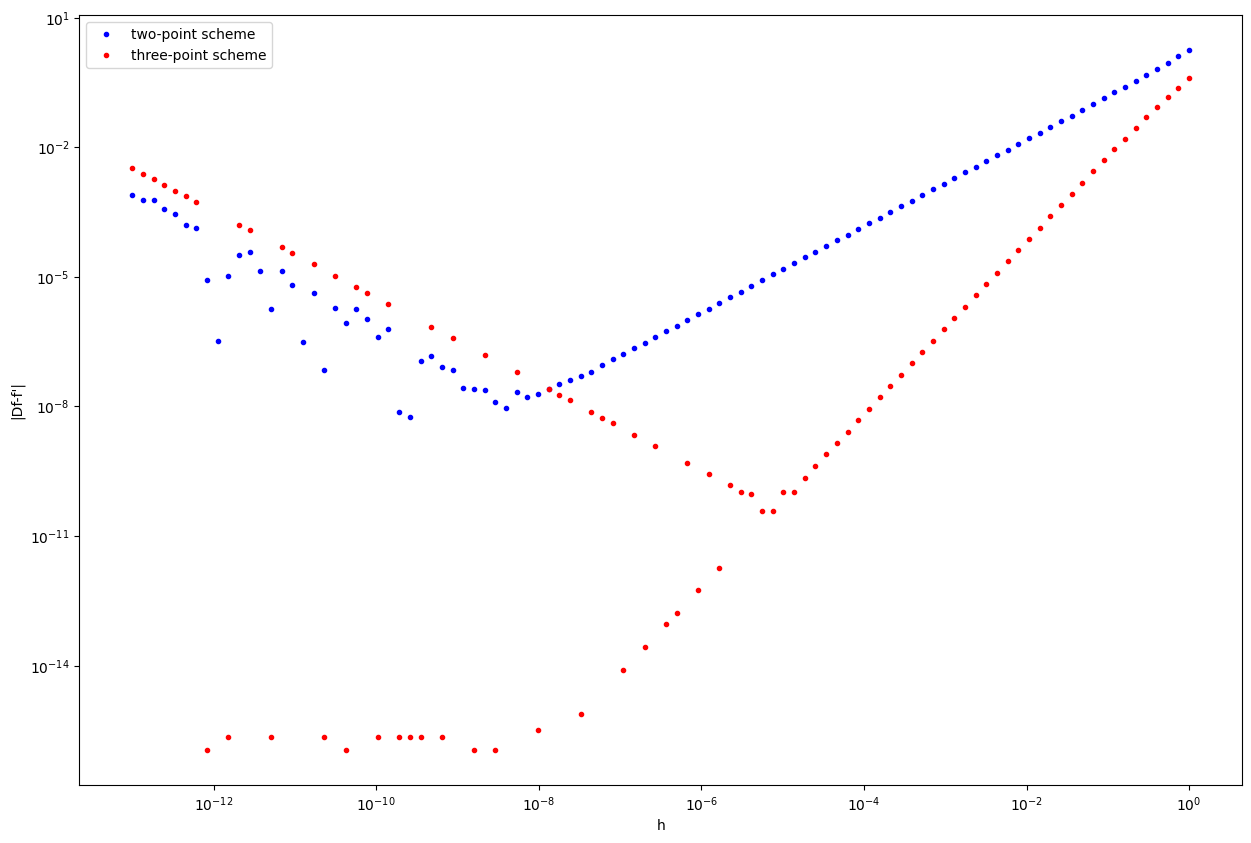

1.0000000089225287
0.9999999996662663


In [10]:
x=1
df_forward_arr_1 = np.array([])
df_forward_arr_2 = np.array([])
h_arr = np.logspace(-13, 0, num=100)

def der_forward_1(f, x, h):
    numerator = f(x+h)-f(x)
    denominator = h
    return numerator/denominator

def der_forward_2(f, x, h):
    x1 = x+h
    x2 = x+2*h
    dx = x2-x1
    numerator = -3*f(x)+4*f(x1)-f(x2)
    denominator = 2*dx
    return numerator/denominator

for h in h_arr:
    df_forward_arr_1 = np.append(
        df_forward_arr_1, np.abs(der_forward_1(f, x, h)-fder(x)))
    df_forward_arr_2 = np.append(
        df_forward_arr_2, np.abs(der_forward_2(f, x, h)-fder(x)))

plt.figure(figsize=(15, 10))

plt.loglog(h_arr, df_forward_arr_1, 'b.', label='two-point scheme')
plt.loglog(h_arr, df_forward_arr_2, 'r.', label='three-point scheme')
plt.xlabel('h')
plt.ylabel("|Df-f'|")
plt.legend()
plt.show()

print(der_forward_1(f, x, 10**(-8)))

print(der_forward_2(f, x, 10**(-6)))

$h_{opt}^1$~$10^{-8}~~~f_{opt}^{'1}$~$1.0000000090$

$h_{opt}^2$~$10^{-6}~~~f_{opt}^{'2}$~$0.9999999997$

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [7]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


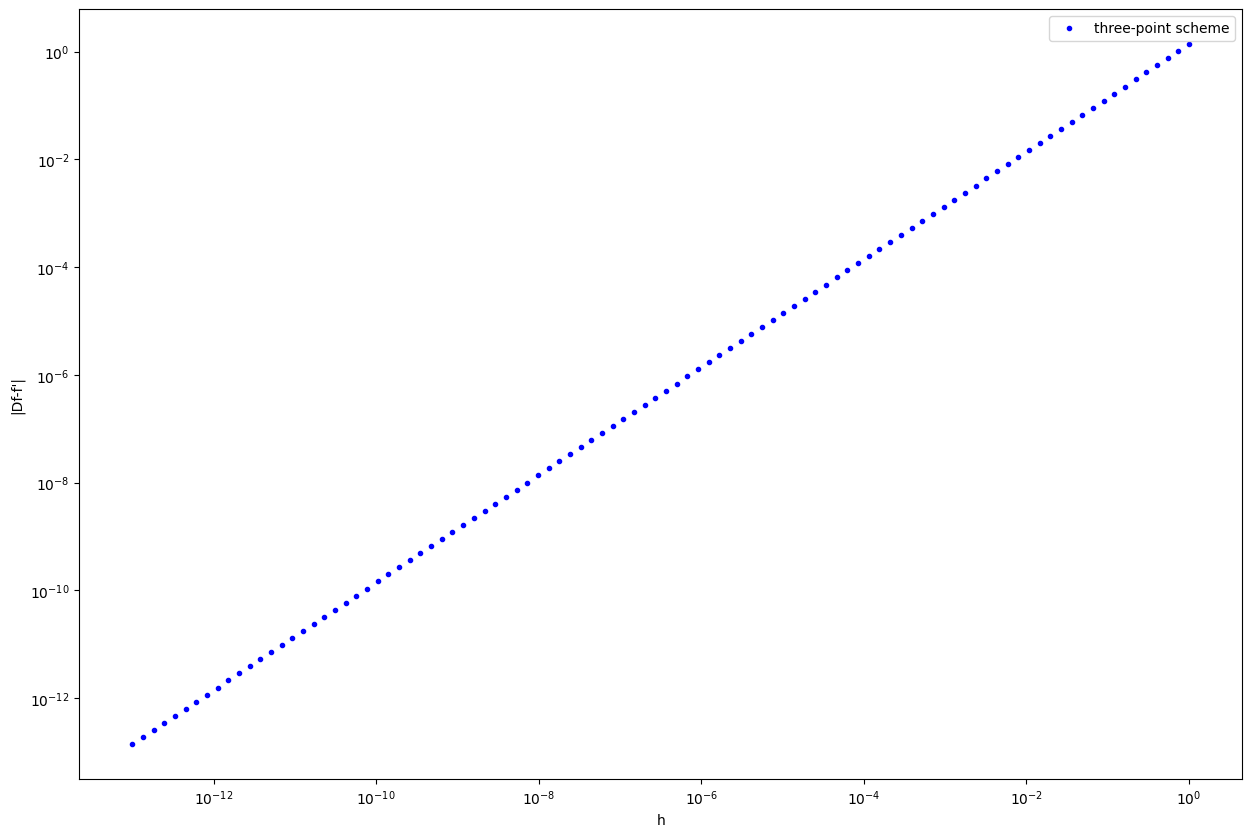

In [11]:
x=0
df_forward_arr_2 = np.array([])


for h in h_arr:
    df_forward_arr_2 = np.append(
        df_forward_arr_2, np.abs(der_forward_2(f, x, h)-fder(x)))

plt.figure(figsize=(15, 10))

plt.loglog(h_arr, df_forward_arr_2, 'b.', label='three-point scheme')
plt.xlabel('h')
plt.ylabel("|Df-f'|")
plt.legend()
plt.show()


$D(f)={{-3f(0)+4f(h)-f(2h)}\over{2h}}=f'(0)+\epsilon_f$

$\epsilon_f={{4h^2log(h)-4h^2log(2h)}\over{2h}}=2log(2)h$

Это мы и видим

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [13]:
def calc_I(func, a, b , n):
    h = (b-a)/(n+1)
    I = 0
    for k in range(1, n+1):
        I += h*(func(a+(1/2+k)*h))
    return I


def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    N = int(np.ceil((b-a)/np.sqrt(eps)-1))
    i, key = 0, True
    while key:
        I_N = calc_I(func, a, b, N)
        I_2N = calc_I(func, a, b, 2*N)
        err = abs(I_N-I_2N)
        if err < eps or i > 10:
            key = False
        else:
            i += 1
            N *= 2
    return I_N, N

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


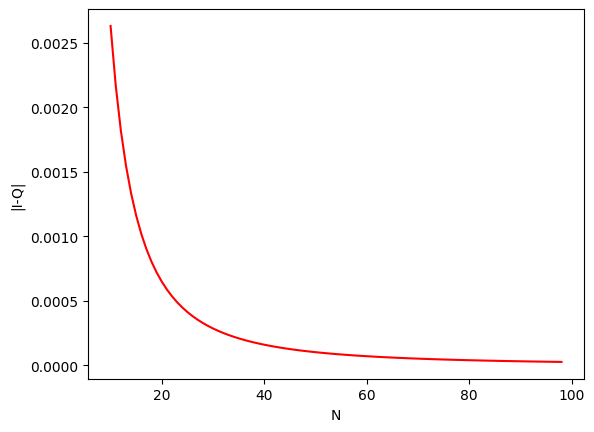

eps_Q = 2.575000000004657e-05


In [14]:
f = lambda x: 3*x**2
F = lambda x: x**3
eps = 1e-4
err_=[]
a, b = 0, 1
#Из оценки R~h^2
N_max = int(np.ceil((b-a)/np.sqrt(eps)-1))
N_ = np.arange(10, N_max, 1)
for N in N_:
    err_.append(abs(calc_I(f, a, b, N)-(F(b)-F(a))))
plt.plot(N_, err_,'r-')
plt.xlabel('N')
plt.ylabel('|I-Q|')
plt.show()

print("eps_Q = %s" % abs(calc_I(f, a, b, N_max)-(F(b)-F(a))))

Как видно из графика $\epsilon_Q$
действительно пропорционален $1\over N^2$

Наша оценка интеграла вышла с ошибкой в
$\epsilon_Q =2.6*10^{-5}$, что лежит в интервале
заданной ошибки $\epsilon_Q =1*10^{-4}$.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$
\int_0^1\ \frac{\sin{\sqrt{x}}}{x}\ dx
$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [10]:
def midpoint_rule(func, a, b, eps):
    N = int(np.ceil((b-a)/np.sqrt(eps)-1))
    i, key = 0, True
    while key:
        I_N = calc_I(func, a, b, N)
        I_2N = calc_I(func, a, b, 2*N)
        err = abs(I_N-I_2N)
        if err < eps:
            key = False
        else:
            i += 1
            N *= 2
    return I_N, N, err, i

a, b = 0, 1
f = lambda x: np.sin(np.sqrt(x))/x
time_start = monotonic()
Q, N, eps, it = midpoint_rule(f, a, b, eps=1e-4)
time_end = monotonic()
print("Number of intervals = %s" % N)
print("Number of iterations = %s" % it)
print("Q = %s" % Q)
print("Exact error = %s" % abs(Q - 1.892166))
print("Execution time {delta}".format(delta=time_end-time_start))

Number of intervals = 51904512
Number of iterations = 19
Q = 1.891885882815218
Exact error = 0.00028011718478193615
Execution time 1383.5630000000006


Потребовалось 19 увеличений N в два раза.. (~20 минут)

$
\int_0^1\ \frac{\sin{\sqrt{x}}}{x}\ dx = \int_0^\epsilon\ \frac{\sin{\sqrt{x}}}{x}\ dx +
\int_\epsilon^1\ \frac{\sin{\sqrt{x}}}{x}\ dx \approx
\int_0^\epsilon\ (\frac{1}{\sqrt{x}} -\frac{x^{1/2}}{6} + \overline{O}(x^{3/2}))\ dx  +
\int_\epsilon^1\ \frac{\sin{\sqrt{x}}}{x}\ dx =
$

$
= 2\sqrt{\epsilon} - \frac{\epsilon^{3/2}}{9} + \overline{O}(\epsilon^{5/2}) +
\int_\epsilon^1\ \frac{1}{\sqrt{x}}\ dx
$

Тогда можем взять $\epsilon = h$

In [11]:
def midpoint_rule(func, b, eps):
    N = int(np.ceil(b/np.sqrt(eps)-1))
    i, key = 0, True
    h = b/(N+2)
    while key:

        I_N = calc_I(func, h, b, N)
        I_2N = calc_I(func, h, b, 2*N)
        err = abs(I_N-I_2N)
        if err < eps:
            key = False
        else:
            i += 1
            N *= 2
    return I_N, N, i, h

b = 1
f = lambda x: np.sin(np.sqrt(x))/x
time_start = monotonic()
Q, N, it, h = midpoint_rule(f, b, eps=1e-4)
time_end = monotonic()
I = Q + 2*np.sqrt(h) - h**(3/2)/9

print("Number of intervals = %s" % N)
print("Number of iterations = %s" % it)
print("Q = %s" % I)
print("Exact error = %s" % abs(I - 1.892166))
print("Execution time {delta}".format(delta=time_end-time_start))

Number of intervals = 50688
Number of iterations = 9
Q = 1.8919702184380855
Exact error = 0.00019578156191446539
Execution time 1.0


9 итераций (~1 секунда) и лучшая точность..

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$

$
\int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx = \int_0^\epsilon\ \frac{e^x}{\sqrt{x(1-x)}}dx +
\int_\epsilon^{1-\epsilon}\ \frac{e^x}{\sqrt{x(1-x)}}dx + \int_{1-\epsilon}^1\ \frac{e^x}{\sqrt{x(1-x)}}dx
$

$
\int_0^\epsilon\ \frac{e^x}{\sqrt{x(1-x)}}dx \approx \int_0^\epsilon\ (\frac{1}{\sqrt{x}} +
\frac{3}{2}\sqrt{x} + \overline{O}(x^{3/2}))\ dx = 2\sqrt{\epsilon}+\epsilon^{3/2}+\overline{O}(\epsilon^{5/2})
$

$
\int_{1-\epsilon}^1\ \frac{e^x}{\sqrt{x(1-x)}}dx \approx \int_{1-\epsilon}^1\ e*(\frac{1}{\sqrt{1-x}} +
\frac{3}{2}\sqrt{1-x} + \overline{O}((1-x)^{3/2}))\ dx = 2e\sqrt{\epsilon}+e\epsilon^{3/2}+\overline{O}(\epsilon^{5/2})
$

$\epsilon = h$

$
I \approx (e+1)(2\sqrt{h}+h^{3/2})+\int_h^{1-h}\ \frac{e^x}{\sqrt{x(1-x)}}dx
$

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [26]:
def calc_I_trapezoid(f, a, b , n):
    h = (b-a)/n
    I = 0
    for k in range(1, n+1):
        I += (h/2) * (f(a+k*h)+f(a+(k-1)*h))
    return I


def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """




    func = lambda x: np.exp(x)/np.sqrt(x*(1-x))
    h = 1/npts
    I_N = calc_I_trapezoid(func, h, 1-h, npts) + (np.e+1)*(2*np.sqrt(h)+h**(3/2))

    return I_N
N = 10000
I = integ(N)


print("I = %s" % I)
print("Error = %s" % (I - 5.508429))


I = 5.509906958218986
Error = 0.0014779582189863305


In [13]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
